In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [77]:
def mask_map(m, n_min=3, n_max=7):
    mask = np.zeros((24,24))
    new_m = np.zeros((24,24))
    r = np.random.randint(1,5)
    n = np.random.randint(n_min, n_max)
    pos = np.random.randint(0,24,(n,2))
    for p in pos:
        new_m[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)] = m[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)]
        mask[max(0,p[0]-r):min(24,p[0]+r+1),max(0,p[1]-r):min(24,p[1]+r+1)] = 1
    print(pos, r, n)
    return new_m, mask
    

In [65]:
def energy_function(d):
    return np.sin(1.2*d+1)*4
def calculate_energy(pos):
    pos2 = [abs(pos[1]-23),abs(pos[0]-23)]
    a = np.stack((np.repeat(np.arange(24),24,axis=0).reshape((24,24)),
                  np.repeat(np.arange(24),24,axis=0).reshape((24,24)).T),axis=2)
    out = energy_function(np.linalg.norm(a-np.array(pos),axis=2)) +  energy_function(np.linalg.norm(a-np.array(pos2),axis=2))
    return out

In [74]:
energy_maps = []
positions = []
for x in range(24):
    for y in range(24):
        if x+y>23:
            break
        energy_maps.append(calculate_energy([x,y]))
        positions.append([x,y])
    

In [76]:
import time


In [75]:
np.save("energy_data.npy", energy_maps)
np.save("energy_targets.npy", positions)

[[ 8 10]
 [ 8 21]
 [ 6  3]
 [ 0  6]
 [17 14]
 [ 8 16]] 4 6
0.0 0


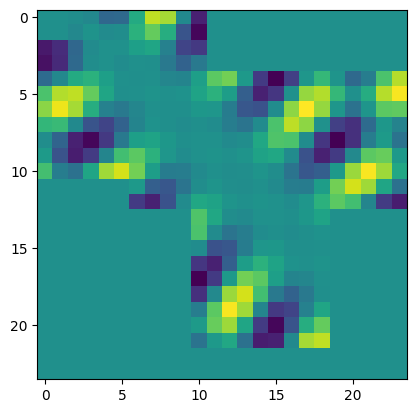

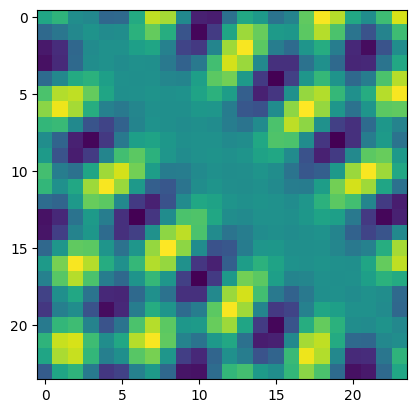

In [106]:
a = np.random.randint(300)
m = energy_maps[a]
m_read, mask = mask_map(m)
start = time.time()
m_match = None
c = 0
for m2 in energy_maps:
    if (m_read==mask*m2).all():
        m_match = m2
        break
        c += 1
print(time.time()-start, c)
plt.imshow(m_read)
plt.show()
plt.imshow(m_match)
plt.show()